<a href="https://colab.research.google.com/github/fatemesima/Online-Hierarchical-Clustering/blob/main/HAC_OTD_OHAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
def dist(x,y):
    dis = 0
    d = len(x)
    for i in range(d):
        dis += (x[i]-y[i])**2
    return math.sqrt(dis)


def diameter(s):
    diam = 0
    for x in s:
        for y in s:
            dis = dist(x,y)
            if diam < dis:
                diam = dis
    return diam

In [ ]:
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cosine
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd


##s = np.random.normal(0,1,size=[N, 2])
# url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
# df1 = pd.read_csv(url)
# df1.drop('patient', inplace=True, axis=1)
# df1.head()
# mapping = {label:idx for idx,label in enumerate(np.unique(df1['sex']))}
# df1['sex'] = df1['sex'].map(mapping)
# mapping = {label:idx for idx,label in enumerate(np.unique(df1['agegrp']))}
# df1['agegrp'] = df1['agegrp'].map(mapping)
# X=df1.to_numpy()

##### iris
# iris = datasets.load_iris()
# X = iris.data[:, :4]

####mnist
# url = 'https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/MNIST.csv'
# df1 = pd.read_csv(url)
# X= df1.to_numpy()

####zoo
# url = 'https://raw.githubusercontent.com/sharmaroshan/Zoo-Dataset/master/zoo.csv'
# data = pd.read_csv(url)
# data.drop('animal_name', inplace=True, axis=1)
# X= data.to_numpy()


###glass
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.drop('1', inplace=True, axis=1)
df1.to_numpy()
X = np.vstack([df1, [ 1.52101 , 13.64 , 4.49 , 1.10 , 71.78 , 0.06, 8.75, 0.00, 0.00]])



###r15
# !wget https://cs.joensuu.fi/sipu/datasets/R15.txt
# example1 = "R15.txt"
# from numpy.core.multiarray import datetime_data
# data=[]
# import re
# import numpy as np
# from ast import literal_eval
# with open(example1, "r") as file1:
#     for line in file1:
#       s=re.sub("[\t]", "," , line)
#       s.strip("\n")
#       data.append(s.rstrip("\n"))
# X = np.array([literal_eval(x) for x in data])
# X = np.delete(X,-1,axis=1)


####Pathbased
# !wget https://cs.joensuu.fi/sipu/datasets/pathbased.txt
# example1 = "pathbased.txt"
# from numpy.core.multiarray import datetime_data
# data=[]
# import re
# import numpy as np
# from ast import literal_eval
# with open(example1, "r") as file1:
#     for line in file1:
#       s=re.sub("[\t]", "," , line)
#       s.strip("\n")
#       data.append(s.rstrip("\n"))
# X = np.array([literal_eval(x) for x in data])
# X = np.delete(X,-1,axis=1)


####AGG
# !wget https://cs.joensuu.fi/sipu/datasets/Aggregation.txt
# example1 = "Aggregation.txt"
# from numpy.core.multiarray import datetime_data
# data=[]
# import re
# import numpy as np
# from ast import literal_eval
# with open(example1, "r") as file1:
#     for line in file1:
#       s=re.sub("[\t]", "," , line)
#       s.strip("\n")
#       data.append(s.rstrip("\n"))
# X = np.array([literal_eval(x) for x in data])
# X = np.delete(X,-1,axis=1)

##plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
##for i, txt in enumerate(range(len(X))):
##    plt.annotate(txt, (X[i,0], X[i,1]))


N = len(X)

# diam = diameter(X)
# def simfunc(x,y):
#     return (diam - dist(x,y))/diam





##def simfunc(x,y):
##    return 1-cosine(x,y)

##def simfunc(x,y):
##    return np.dot(x,y)

#Gaussian kernel similarity

def simfunc(x,z,sigma=5):
  return np.exp((-(np.linalg.norm(x-z)**2))/(2*sigma**2))

SIM = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        SIM[i,j] = simfunc(X[i],X[j])


Dist = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        Dist[i,j] = dist(X[i],X[j])



In [ ]:
# np.random.shuffle(X)

In [ ]:
def findmax(a,b,c):
  if a>= b and a>= c:
    return a
  elif b>= a and b>= c:
    return b
  else:
    return c

In [ ]:
class Node:
    def __init__(self, val):
        # self.parent = None
        self.left = None
        self.right = None
        self.element = val

    def __iter__(self):
        if self.left:
            yield from self.left

        yield self.element

        if self.right:
            yield from self.right

        if self.parent:
          yield from self.parent



    def display(self):
            lines, *_ = self._display_aux()
            for line in lines:
                print(line)

    def _display_aux(self):
            """Returns list of strings, width, height, and horizontal coordinate of the root."""
            # No child.
            if self.right is None and self.left is None:
                line = '%s' % self.element
                width = len(line)
                height = 1
                middle = width // 2
                return [line], width, height, middle

            # Only left child.
            if self.right is None:
                lines, n, p, x = self.left._display_aux()
                s = '%s' % self.element
                u = len(s)
                first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
                second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
                shifted_lines = [line + u * ' ' for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

            # Only right child.
            if self.left is None:
                lines, n, p, x = self.right._display_aux()
                s = '%s' % self.element
                u = len(s)
                first_line = s + x * '_' + (n - x) * ' '
                second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
                shifted_lines = [u * ' ' + line for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

            # Two children.
            left, n, p, x = self.left._display_aux()
            right, m, q, y = self.right._display_aux()
            s = '%s' % self.element
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
            second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
            if p < q:
                left += [n * ' '] * (q - p)
            elif q < p:
                right += [m * ' '] * (p - q)
            zipped_lines = zip(left, right)
            lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
            return lines, n + m + u, max(p, q) + 2, n + u // 2



In [ ]:
class BinaryTree:
    def __init__(self):
        self.root = None

    def getRoot(self):
        return self.root

    def addroot(self,val):
        if self.root is not None:
           print("Tree is not empty!")
        else:
           self.root = Node(val)

    def addleft(self,p, val):
        if (p is None):
            print("Empty Reference!")
            return
        if(p.left is not None):
            print("Left child is already present!")
            return
        else:
            p.left = Node(val)
            return p.left

    def addright(self,p, val):
        if (p is None):
            print("Empty Reference!")
            return
        if (p.right is not None):
            print("Right child is already present!")
            return
        else:
            p.right = Node(val)
            return p.right


    def is_leaf(self, p):
        if (p!=None and p.left==None and p.right==None):
            return True
        else:
            return False

    def deleteTree(self):
        self.root = None

    def inOrder(self):
        if(self.root is not None):
            self._inOrder(self.root)

    def _inOrder(self, node):
        if(node is not None):
            self._inOrder(node.left)
            print(str(node.element) + ' ',end='')
            self._inOrder(node.right)

    def get_leaves1(self):
        L = []
        if(self.root is not None):
            self._get_leaves1(self.root, L)
        return L

    def _get_leaves1(self, node, L):
        if(node is not None):
            self._get_leaves1(node.left, L)
            if self.is_leaf(node):
                L.append(node.element)
            self._get_leaves1(node.right, L)

    def get_leaves2(self):
        L = []
        if(self.root is not None):
            self._get_leaves2(self.root, L)
        return L

    def _get_leaves2(self, node, L):
        if(node is not None):
            self._get_leaves2(node.left, L)
            if self.is_leaf(node):
                L.append(node)
            self._get_leaves2(node.right, L)




    def subtreecopy(self, node):

        if node is None:
            return node
        else:
            p = Node(node.element)
            p.left = self.subtreecopy(node.left)
            p.right = self.subtreecopy(node.right)
            return p

    def MWrev(self):
        if (self.root is not None):
            return self._MWrev(self.root)
        else: return 0


    def _MWrev(self, node):
        if (node is not None):
            ab = 0
            LA = []
            self._get_leaves1(node.left, LA)
            LB = []
            self._get_leaves1(node.right, LB)
            for x in LA:
                for y in LB:
                    ab += SIM[x,y]*(N-len(LA)-len(LB))
            la = self._MWrev(node.left)
            lb = self._MWrev(node.right)
            return la + lb + ab

        else:
            return 0



    def __iter__(self):
        if self.root is not None:
            yield from self.root

    def display(self):
        if self.root is not None:
            self.root.display()



In [ ]:
def parent(obj, node):
    if obj is None or obj == node:
      return None
    if obj.left is node:
      return obj
    if obj.right is node:
      return obj
    left_parent = parent(obj.left, node)
    right_parent = parent(obj.right, node)
    return left_parent if  left_parent else right_parent


def sibling(obj,node):
  par = parent(obj , node)
  if par is None:
    return None
  else:
    if par.left and par.right:
      if par.left != node:
        return par.left
      else:
        return par.right



In [ ]:
def Merge(T1,T2): ## merge two binary trees

    r = Node('*')
    T = BinaryTree()
    T.root = r
    T.root.left = T1.root
    T.root.right = T2.root

    return T


def AVGLink(T1,T2): ## compute average link ratio between the leaves of T1 and T2
    L1 = T1.get_leaves1()
    L2 = T2.get_leaves1()
    ss = 0
    for x in L1:
        for y in L2:
            ss +=  SIM[x,y]

    return ss/(len(L1)*len(L2))

def HAC(m):  ## average link hierarchical clustering
    LisTree = []
    n = len(SIM)
    for i in range(m):
        b = BinaryTree()
        b.root = Node(i)
        LisTree.append(b)

    while len(LisTree)> 1:
        ### finding best pairs to merge
        bestidx = 0,1
        bestvalue = 0
        for i in range(len(LisTree)):
            for j in range(i):
                p = AVGLink(LisTree[i],LisTree[j])
                if bestvalue < p:
                    bestidx = i,j
                    bestvalue = p

        T = Merge(LisTree[bestidx[0]],LisTree[bestidx[1]])
        LisTree[bestidx[0]] = T
        del LisTree[bestidx[1]]




    return LisTree[0]




def _HAC(LisTree):
    while len(LisTree)> 1:
        ### finding best pairs to merge
        bestidx = 0,1
        bestvalue = 0
        for i in range(len(LisTree)):
            for j in range(i):
                p = AVGLink(LisTree[i],LisTree[j])
                if bestvalue < p:
                    bestidx = i,j
                    bestvalue = p
        T = Merge(LisTree[bestidx[0]],LisTree[bestidx[1]])
        LisTree[bestidx[0]] = T
        del LisTree[bestidx[1]]

    return LisTree[0]







def wbar(T,x = None):  ## bar{w} function as defined in the OTD paper
    if x == None:
        L = T.get_leaves1()
        count  = 0
        ss = 0
        for i in range(len(L)):
            for j in range(i):
                ss = SIM[L[i],L[j]] + ss
                count = count + 1
        return ss/count

    else:
        L = T.get_leaves1()
        count = 0
        ss = 0
        for i in range(len(L)):
            ss = SIM[L[i],x] + ss
            count = count  + 1

        return ss/count





def _OTD(T = None ,x = -1):  ## OTD parametric
    if T == None:
        T = BinaryTree()
        T.root = Node(x)
        return T

    elif (T.is_leaf(T.root) or (wbar(T) >= wbar(T,x))):
        S = BinaryTree()
        S.root = Node(x)
        return Merge(T,S)

    else:
        A = BinaryTree()
        A.root = T.root.left
        B = BinaryTree()
        B.root = T.root.right
        if wbar(A,x) <= wbar(B,x):
            return Merge(A,_OTD(B,x))
        else:
            return Merge(_OTD(A,x), B)

def OTD(m):  ## OTD main
    n = len(SIM)
    idx = list(range(m))
    #np.random.shuffle(idx)

    T = None

    for i in idx:
        T = _OTD(T,i)
    return T



In [ ]:
def find_depth(root, node):
# Base case
    if (root == None):
        return -1

    # Initialize distance as -1
    dist = -1

    # Check if x is current node=
    if (root == node):
        return dist + 1

    dist = find_depth(root.left, node)
    if dist >= 0:
        return dist + 1
    dist = find_depth(root.right, node)
    if dist >= 0:
        return dist + 1
    return dist




def split(obj,node):
  s=[]
  s.append(node)
  sib1 = sibling(obj,node)
  if sib1:
    s.append(sib1)
  d = find_depth(obj,node)
  for i in range(2,d+1):
    parent1 = parent(obj,s[i-1])
    if parent1:
      sib2 = sibling(obj,parent1)
      if sib2:
          s.append(sib2)

  return s

In [ ]:
def _OHAC(tr=None , x=-1 ):
      if tr == None:
         tr= BinaryTree()
         tr.root = Node(x)
         return tr
      else:
        root = tr.getRoot()
        l = tr.get_leaves2()
        L=[]
        for i in l:
          L.append(i.element)
        min_val = Dist[x][0]
        y = 0
        for i in L:
          if Dist[x][i] < min_val:
            min_val = Dist[x][i]
            y = i
        S = split(root ,l[y])
        S.append(Node(x))
        LisTree = []
        for i in S:
          b = BinaryTree()
          b.root = i
          LisTree.append(b)

        tr = _HAC(LisTree)

        return tr

def OHAC(m):  ## OHAC main
    n = len(SIM)
    idx = list(range(m))
    tr = None
    for j in idx:
        tr = _OHAC(tr,j)
    return tr

In [ ]:
import time
timohac=[]
for m in range(1,201,50):
  start = time.time()
  OHAC(m)
  end = time.time()
  timohac.append(end-start)
print(timohac)

[1.9550323486328125e-05, 0.10463547706604004, 0.510807991027832, 2.1432008743286133]


In [ ]:
import time
timotd=[]
for m in range(1,201,50):
  start = time.time()
  OTD(m)
  end = time.time()
  timotd.append(end-start)
print(timotd)

[1.6927719116210938e-05, 0.03786039352416992, 0.15103554725646973, 1.237349510192871]


In [ ]:
timhac=[]
for m in range(1,201,50):
  start = time.time()
  HAC(m)
  end = time.time()
  timhac.append(end-start)

In [ ]:
!pip install python-bidi
!pip install arabic-reshaper

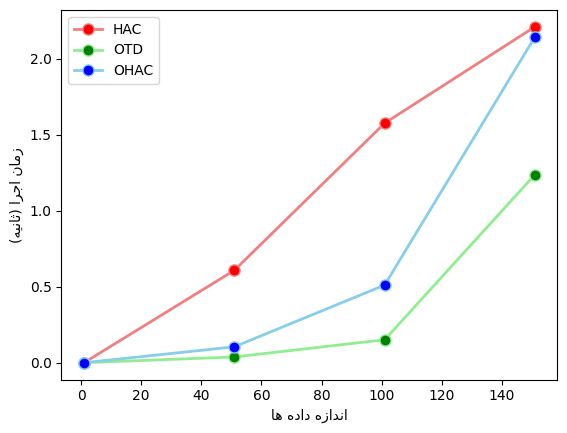

In [ ]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import pandas as pd
df2 = pd.DataFrame({'data size':range(1,201,50),'HAC':timhac ,'OTD':timotd , 'OHAC':timohac })
plt.plot('data size','HAC',data = df2 , marker = 'o', markerfacecolor = 'red', markersize=8, color= 'lightcoral', linewidth=2)
plt.plot('data size','OTD',data = df2 , marker = 'o', markerfacecolor = 'green', markersize=8, color= 'lightgreen', linewidth=2)
plt.plot('data size','OHAC',data = df2 , marker = 'o', markerfacecolor = 'blue', markersize=8, color= 'skyblue', linewidth=2)
plt.xlabel(get_display(reshape('اندازه داده ها')))
plt.ylabel(get_display(reshape('زمان اجرا (ثانیه)')))
plt.legend()
plt.show()

In [ ]:
# rev = tt.MWrev()
# print('MW = ',rev)
# print('MW (normalized) = ',(rev*2)/(N*(N-1)))

In [ ]:
print()
print('N = ', N)
print()

print('OTD ... ', end='')
T = OTD(N)
print('Done.')
#T.display()
print()
rev = T.MWrev()
print('MW = ',rev/(sum))
print('MW (normalized) = ',(rev*2)/(N*(N-1)))

print()

print('HAC ... ', end='')
T = HAC(N)
print('Done.')
#T.display()
print()
rev = T.MWrev()
print('MW = ',rev)
print('MW (normalized) = ',(rev*2)/(N*(N-1)))